# Project 7

## Sys Ops

In [1]:
cd ..

C:\Users\rudyg\Documents\GitHub\P7-ML


In [2]:
pwd

'C:\\Users\\rudyg\\Documents\\GitHub\\P7-ML'

## Imports 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

from sklearn.feature_selection import *
from sklearn.feature_extraction import *
from sklearn.decomposition import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.covariance import *
from sklearn.metrics import *
from sklearn.compose import *

from sklearn.dummy import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.cluster import *

In [4]:
# DO NOT REMOVE THIS LINE

## Data

In [5]:
fn = "application_train.csv"
df = pd.read_csv("./data/source/" + fn)

In [6]:
df.shape

(307511, 122)

In [7]:
# df = df.sample(frac=0.10)
# df

In [8]:
# filter for correl
# df = df.filter(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
#                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
#                ])

df = df.filter(
    [
        "TARGET",
        "NAME_CONTRACT_TYPE",
        "CODE_GENDER",
        "FLAG_OWN_CAR",
        "FLAG_OWN_REALTY",
        "CNT_CHILDREN",
        "AMT_INCOME_TOTAL",
        "AMT_CREDIT",
        "AMT_ANNUITY",
        "AMT_GOODS_PRICE",
        "NAME_TYPE_SUITE",
        "NAME_INCOME_TYPE",
        "NAME_EDUCATION_TYPE",
        "NAME_FAMILY_STATUS",
        "NAME_HOUSING_TYPE",
        "DAYS_BIRTH",
        "DAYS_EMPLOYED",
        "ORGANIZATION_TYPE",
        "OCCUPATION_TYPE",
        "EXT_SOURCE_1",
        "EXT_SOURCE_2",
        "EXT_SOURCE_3",
    ]
)


df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,Business Entity Type 3,Laborers,0.083037,0.262949,0.139376
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,Higher education,Married,House / apartment,-16765,-1188,School,Core staff,0.311267,0.622246,NaN
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,Government,Laborers,NaN,0.555912,0.729567
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,Business Entity Type 3,Laborers,NaN,0.650442,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,Religion,Core staff,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,Secondary / secondary special,Separated,With parents,-9327,-236,Services,Sales staff,0.145570,0.681632,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,Secondary / secondary special,Widow,House / apartment,-20775,365243,XNA,NaN,NaN,0.115992,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,Higher education,Separated,House / apartment,-14966,-7921,School,Managers,0.744026,0.535722,0.218859
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,Secondary / secondary special,Married,House / apartment,-11961,-4786,Business Entity Type 1,Laborers,NaN,0.514163,0.661024


## EDA Exploratory Data Analysis

In [9]:
df.sort_values("AMT_INCOME_TOTAL", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
12840,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,...,Secondary / secondary special,Married,House / apartment,-12615,-922,Business Entity Type 3,Laborers,0.460809,0.113161,0.145543
203693,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,...,Secondary / secondary special,Married,House / apartment,-15704,-4961,Business Entity Type 3,NaN,0.543417,0.788606,NaN
246858,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,...,Higher education,Married,House / apartment,-13551,-280,Business Entity Type 3,NaN,NaN,0.713507,NaN
77768,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,1377000.0,...,Higher education,Civil marriage,House / apartment,-16425,-8476,Business Entity Type 1,Managers,0.652352,0.504086,0.432962
131127,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,675000.0,...,Higher education,Married,House / apartment,-19341,-443,Transport: type 4,Laborers,NaN,0.552838,0.495666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240137,0,Cash loans,F,N,N,0,26100.0,90000.0,4329.0,90000.0,...,Secondary / secondary special,Married,House / apartment,-21003,365243,XNA,NaN,NaN,0.403091,0.181959
186643,0,Cash loans,F,N,N,0,26100.0,54000.0,5391.0,54000.0,...,Secondary / secondary special,Widow,House / apartment,-21469,365243,XNA,NaN,NaN,0.600664,NaN
246104,0,Cash loans,F,N,Y,0,26100.0,173092.5,12438.0,157500.0,...,Secondary / secondary special,Married,House / apartment,-20904,365243,XNA,NaN,NaN,0.087226,NaN
20727,1,Cash loans,F,Y,Y,0,25650.0,2173500.0,48118.5,2173500.0,...,Secondary / secondary special,Civil marriage,House / apartment,-21517,365243,XNA,NaN,0.498675,0.175965,NaN


In [10]:
df.sort_values("AMT_CREDIT", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
133766,0,Cash loans,F,Y,N,1,1307587.5,4050000.0,100197.0,4050000.0,...,Higher education,Married,House / apartment,-15450,-251,Trade: type 2,Managers,0.790213,0.628098,0.538863
14852,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,4050000.0,...,Higher education,Married,Office apartment,-12796,-1372,Trade: type 7,Managers,0.246776,0.639547,0.805020
119681,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,4050000.0,...,Higher education,Married,House / apartment,-12536,-681,Transport: type 4,Managers,0.594641,0.571261,0.652897
120757,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,4050000.0,...,Higher education,Married,House / apartment,-19893,-421,Industry: type 1,NaN,NaN,0.663432,NaN
288455,0,Cash loans,F,Y,N,1,450000.0,4050000.0,106839.0,4050000.0,...,Higher education,Civil marriage,House / apartment,-16609,-3044,Business Entity Type 3,Managers,0.781929,0.685893,0.758393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75227,0,Cash loans,F,Y,Y,0,315000.0,45000.0,2749.5,45000.0,...,Secondary / secondary special,Married,House / apartment,-23555,365243,XNA,NaN,NaN,0.306580,0.706205
246541,0,Cash loans,F,N,Y,0,67500.0,45000.0,4977.0,45000.0,...,Secondary / secondary special,Separated,House / apartment,-14650,-987,Business Entity Type 3,Laborers,NaN,0.570645,0.448962
151516,0,Cash loans,M,N,N,0,54000.0,45000.0,4846.5,45000.0,...,Secondary / secondary special,Married,House / apartment,-20413,-456,School,Drivers,NaN,0.574648,NaN
271384,0,Cash loans,M,N,N,0,112500.0,45000.0,3006.0,45000.0,...,Secondary / secondary special,Civil marriage,With parents,-10271,-1563,Business Entity Type 3,NaN,0.123587,0.636850,0.394495


In [11]:
df.sort_values("AMT_ANNUITY", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
17948,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,4050000.0,...,Higher education,Married,House / apartment,-15176,-201,Industry: type 4,Managers,0.755408,0.706927,0.553165
101508,0,Cash loans,F,N,N,0,1575000.0,2303460.0,230161.5,2250000.0,...,Higher education,Married,House / apartment,-20273,-2334,Other,NaN,NaN,0.638760,0.746300
157614,0,Revolving loans,M,Y,Y,2,1125000.0,2250000.0,225000.0,2250000.0,...,Higher education,Single / not married,House / apartment,-16352,-5523,Bank,NaN,0.460076,0.594216,0.786267
141371,0,Revolving loans,M,Y,Y,3,1350000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-16790,-1626,Trade: type 2,Managers,0.575695,0.744528,NaN
266148,0,Revolving loans,M,Y,N,0,900000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-22766,-1039,Other,Accountants,0.870042,0.744162,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123872,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,Self-employed,Secretaries,0.400723,0.510934,0.581484
207186,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,...,Higher education,Married,House / apartment,-10151,-472,Security,Security staff,NaN,0.706306,0.391055
227939,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,...,Higher education,Married,Municipal apartment,-16344,-1478,Business Entity Type 3,Sales staff,NaN,0.618698,0.431192
239329,0,Cash loans,F,N,Y,0,157500.0,792000.0,NaN,792000.0,...,Secondary / secondary special,Married,House / apartment,-17661,-2885,Other,Managers,0.775404,0.656305,0.651260


In [12]:
df.sort_values("AMT_GOODS_PRICE", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
14852,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,4050000.0,...,Higher education,Married,Office apartment,-12796,-1372,Trade: type 7,Managers,0.246776,0.639547,0.805020
120757,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,4050000.0,...,Higher education,Married,House / apartment,-19893,-421,Industry: type 1,NaN,NaN,0.663432,NaN
133766,0,Cash loans,F,Y,N,1,1307587.5,4050000.0,100197.0,4050000.0,...,Higher education,Married,House / apartment,-15450,-251,Trade: type 2,Managers,0.790213,0.628098,0.538863
288455,0,Cash loans,F,Y,N,1,450000.0,4050000.0,106839.0,4050000.0,...,Higher education,Civil marriage,House / apartment,-16609,-3044,Business Entity Type 3,Managers,0.781929,0.685893,0.758393
110459,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,4050000.0,...,Higher education,Married,House / apartment,-14940,-632,Business Entity Type 3,Managers,0.335628,0.280597,0.786267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,NaN,...,Higher education,Married,House / apartment,-11313,-1470,Business Entity Type 3,Sales staff,NaN,0.449139,0.574447
304784,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,NaN,...,Secondary / secondary special,Married,House / apartment,-16870,-825,Self-employed,Drivers,NaN,0.441976,0.459690
305833,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,NaN,...,Incomplete higher,Single / not married,With parents,-10440,-3444,Self-employed,Core staff,0.164542,0.480353,0.698668
306126,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,NaN,...,Secondary / secondary special,Married,Municipal apartment,-15406,-427,Security,NaN,0.715165,0.675154,0.321735


In [13]:
# on exclut ces lignes car elles font planter le fit

df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Businessman')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Maternity leave')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Student')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Unemployed')].index)

df = df.drop(df[(df['NAME_FAMILY_STATUS'] == 'Unknown')].index)

df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,Business Entity Type 3,Laborers,0.083037,0.262949,0.139376
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,Higher education,Married,House / apartment,-16765,-1188,School,Core staff,0.311267,0.622246,NaN
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,Government,Laborers,NaN,0.555912,0.729567
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,Business Entity Type 3,Laborers,NaN,0.650442,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,Religion,Core staff,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,Secondary / secondary special,Separated,With parents,-9327,-236,Services,Sales staff,0.145570,0.681632,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,Secondary / secondary special,Widow,House / apartment,-20775,365243,XNA,NaN,NaN,0.115992,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,Higher education,Separated,House / apartment,-14966,-7921,School,Managers,0.744026,0.535722,0.218859
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,Secondary / secondary special,Married,House / apartment,-11961,-4786,Business Entity Type 1,Laborers,NaN,0.514163,0.661024


In [14]:
df.sort_values("DAYS_BIRTH", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
235444,0,Cash loans,F,Y,Y,0,112500.0,297000.0,25618.5,297000.0,...,Secondary / secondary special,Single / not married,House / apartment,-7489,-797,Self-employed,Private service staff,NaN,0.376463,NaN
168135,0,Cash loans,F,N,Y,0,90000.0,225000.0,17905.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-7673,-440,Other,NaN,NaN,0.302255,NaN
170384,0,Revolving loans,F,N,Y,0,112500.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Single / not married,House / apartment,-7676,-433,Trade: type 7,Sales staff,0.481254,0.662171,NaN
53702,0,Cash loans,M,N,N,0,178447.5,1247472.0,47515.5,1147500.0,...,Secondary / secondary special,Civil marriage,House / apartment,-7676,-182,Trade: type 2,Sales staff,NaN,0.430559,0.432962
137182,0,Revolving loans,F,N,Y,1,81000.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Married,House / apartment,-7678,-1038,Business Entity Type 3,NaN,0.348189,0.199651,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130108,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-25197,365243,XNA,NaN,NaN,0.703107,0.694093
143266,0,Cash loans,F,N,Y,0,202500.0,225000.0,22050.0,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-25200,-16651,Medicine,Medicine staff,NaN,0.713440,0.802745
63316,0,Cash loans,F,N,Y,0,61830.0,112500.0,11088.0,112500.0,...,Secondary / secondary special,Widow,House / apartment,-25201,365243,XNA,NaN,NaN,0.214401,0.812823
124430,0,Cash loans,F,N,N,0,180000.0,225000.0,21276.0,225000.0,...,Higher education,Married,House / apartment,-25201,365243,XNA,NaN,0.789469,0.425062,0.722393


In [15]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
76790,0,Cash loans,F,N,N,0,252000.0,2013840.0,53253.0,1800000.0,...,Higher education,Married,Municipal apartment,-20969,365243,XNA,NaN,NaN,0.636537,0.768808
246857,0,Cash loans,F,N,Y,0,225000.0,278460.0,20947.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-20569,365243,XNA,NaN,NaN,0.688647,0.404878
60456,0,Cash loans,F,N,Y,0,216000.0,517500.0,18715.5,517500.0,...,Higher education,Married,House / apartment,-23229,365243,XNA,NaN,NaN,0.628705,0.484851
60455,0,Cash loans,F,N,Y,1,112500.0,808650.0,23643.0,675000.0,...,Secondary / secondary special,Single / not married,House / apartment,-21535,365243,XNA,NaN,NaN,0.296144,0.347418
60446,0,Cash loans,M,Y,Y,0,117000.0,95940.0,9616.5,90000.0,...,Secondary / secondary special,Widow,House / apartment,-23591,365243,XNA,NaN,NaN,0.520737,0.713631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234168,0,Cash loans,F,N,N,0,171000.0,284400.0,16456.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-24794,-17522,Trade: type 6,High skill tech staff,NaN,0.258225,0.332851
35191,0,Cash loans,F,Y,Y,0,135000.0,284400.0,16011.0,225000.0,...,Secondary / secondary special,Widow,House / apartment,-24254,-17531,Medicine,Managers,NaN,0.420840,0.502878
208899,0,Cash loans,F,N,N,0,225000.0,247275.0,17716.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-24460,-17546,Medicine,NaN,NaN,0.645489,0.744932
273069,0,Cash loans,F,N,Y,0,135000.0,254700.0,14751.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-24468,-17583,Medicine,Laborers,NaN,0.745650,0.832785


In [16]:
df.loc[df["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = float("NaN")

In [17]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
121625,1,Cash loans,F,N,Y,1,112500.0,134775.0,7438.5,112500.0,...,Secondary / secondary special,Civil marriage,House / apartment,-15053,0.0,Self-employed,Sales staff,NaN,0.558081,0.609276
23691,0,Cash loans,F,N,N,2,189000.0,983299.5,36571.5,904500.0,...,Higher education,Separated,House / apartment,-12609,0.0,Business Entity Type 1,NaN,0.409224,0.323724,0.379100
246105,0,Cash loans,F,N,Y,0,126000.0,729792.0,24246.0,630000.0,...,Secondary / secondary special,Married,House / apartment,-23798,-1.0,Medicine,Private service staff,NaN,0.720433,0.289611
111965,1,Cash loans,M,Y,N,1,427500.0,733315.5,43006.5,679500.0,...,Secondary / secondary special,Married,House / apartment,-17386,-2.0,Restaurant,NaN,NaN,0.105033,0.352340
161893,0,Cash loans,F,N,N,0,157500.0,1012500.0,43029.0,1012500.0,...,Secondary / secondary special,Married,House / apartment,-18617,-2.0,Industry: type 11,Laborers,NaN,0.032957,0.691021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,0,Cash loans,F,N,Y,0,202500.0,703728.0,29943.0,607500.0,...,Secondary / secondary special,Single / not married,House / apartment,-22414,NaN,XNA,NaN,NaN,0.195625,0.360613
307483,0,Cash loans,F,N,Y,0,99000.0,247275.0,16479.0,225000.0,...,Secondary / secondary special,Separated,House / apartment,-24911,NaN,XNA,NaN,NaN,0.589906,0.520898
307487,0,Cash loans,M,N,Y,0,117000.0,1071909.0,31473.0,936000.0,...,Secondary / secondary special,Married,House / apartment,-23125,NaN,XNA,NaN,NaN,0.307082,0.255332
307505,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-24384,NaN,XNA,NaN,NaN,0.346391,0.742182


In [18]:
df.sort_values("DAYS_EMPLOYED", ascending=True)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
280994,0,Cash loans,F,Y,Y,0,180000.0,225000.0,21919.5,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-24577,-17912.0,Business Entity Type 3,High skill tech staff,NaN,0.479753,0.652897
273069,0,Cash loans,F,N,Y,0,135000.0,254700.0,14751.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-24468,-17583.0,Medicine,Laborers,NaN,0.745650,0.832785
208899,0,Cash loans,F,N,N,0,225000.0,247275.0,17716.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-24460,-17546.0,Medicine,NaN,NaN,0.645489,0.744932
35191,0,Cash loans,F,Y,Y,0,135000.0,284400.0,16011.0,225000.0,...,Secondary / secondary special,Widow,House / apartment,-24254,-17531.0,Medicine,Managers,NaN,0.420840,0.502878
234168,0,Cash loans,F,N,N,0,171000.0,284400.0,16456.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-24794,-17522.0,Trade: type 6,High skill tech staff,NaN,0.258225,0.332851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,0,Cash loans,F,N,Y,0,202500.0,703728.0,29943.0,607500.0,...,Secondary / secondary special,Single / not married,House / apartment,-22414,NaN,XNA,NaN,NaN,0.195625,0.360613
307483,0,Cash loans,F,N,Y,0,99000.0,247275.0,16479.0,225000.0,...,Secondary / secondary special,Separated,House / apartment,-24911,NaN,XNA,NaN,NaN,0.589906,0.520898
307487,0,Cash loans,M,N,Y,0,117000.0,1071909.0,31473.0,936000.0,...,Secondary / secondary special,Married,House / apartment,-23125,NaN,XNA,NaN,NaN,0.307082,0.255332
307505,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-24384,NaN,XNA,NaN,NaN,0.346391,0.742182


In [19]:
df.loc[df["ORGANIZATION_TYPE"] == "XNA", "ORGANIZATION_TYPE"] = float("NaN")

In [20]:
df.TARGET.value_counts(normalize=True)

TARGET
0    0.919289
1    0.080711
Name: proportion, dtype: float64

In [21]:
df.TARGET.value_counts()

TARGET
0    282639
1     24815
Name: count, dtype: int64

In [22]:
# Transformations

df.loc[df["CODE_GENDER"] == "M", "CODE_GENDER"] = 1
df.loc[df["CODE_GENDER"] == "F", "CODE_GENDER"] = 2
df.loc[df["CODE_GENDER"] == "XNA", "CODE_GENDER"] = 2

# on transforme la colonne CODE_GENDER en int
df.CODE_GENDER = df.CODE_GENDER.astype("int")

df.loc[df["FLAG_OWN_CAR"] == "Y", "FLAG_OWN_CAR"] = 1
df.loc[df["FLAG_OWN_CAR"] == "N", "FLAG_OWN_CAR"] = 0

# on transforme la colonne FLAG_OWN_CAR en int
df.FLAG_OWN_CAR = df.FLAG_OWN_CAR.astype("int")

df.loc[df["FLAG_OWN_REALTY"] == "Y", "FLAG_OWN_REALTY"] = 1
df.loc[df["FLAG_OWN_REALTY"] == "N", "FLAG_OWN_REALTY"] = 0

# on transforme la colonne FLAG_OWN_REALTY en int
df.FLAG_OWN_REALTY = df.FLAG_OWN_REALTY.astype("int")

df.DAYS_BIRTH = -df.DAYS_BIRTH / 365
df.DAYS_EMPLOYED = -df.DAYS_EMPLOYED / 365

df.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER              int32
FLAG_OWN_CAR             int32
FLAG_OWN_REALTY          int32
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
ORGANIZATION_TYPE       object
OCCUPATION_TYPE         object
EXT_SOURCE_1           float64
EXT_SOURCE_2           float64
EXT_SOURCE_3           float64
dtype: object

In [23]:
df.isna().mean()

TARGET                 0.000000
NAME_CONTRACT_TYPE     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
AMT_CREDIT             0.000000
AMT_ANNUITY            0.000039
AMT_GOODS_PRICE        0.000898
NAME_TYPE_SUITE        0.004192
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.180033
ORGANIZATION_TYPE      0.180033
OCCUPATION_TYPE        0.313416
EXT_SOURCE_1           0.563811
EXT_SOURCE_2           0.002147
EXT_SOURCE_3           0.198182
dtype: float64

In [24]:
df.select_dtypes(include="object").nunique()

NAME_CONTRACT_TYPE      2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        4
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
ORGANIZATION_TYPE      57
OCCUPATION_TYPE        18
dtype: int64

In [25]:
df["nan_EXT_SOURCE_1"] = df.EXT_SOURCE_1.isna().astype("int")

# on exclut ORGANIZATION_TYPE, OCCUPATION_TYPE, EXT_SOURCE_1 car trop de NaN
df.drop(
    columns=["ORGANIZATION_TYPE", "OCCUPATION_TYPE", "EXT_SOURCE_1"],
    inplace=True,
    errors="ignore",
)

df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
0,1,Cash loans,1,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,0.262949,0.139376,0
1,0,Cash loans,2,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,0.622246,NaN,0
2,0,Revolving loans,1,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,0.555912,0.729567,1
3,0,Cash loans,2,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,0.650442,NaN,1
4,0,Cash loans,1,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,0.322738,NaN,1


In [26]:
# df.corr()

In [27]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
0,1,Cash loans,1,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,0.262949,0.139376,0
1,0,Cash loans,2,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,0.622246,NaN,0
2,0,Revolving loans,1,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,0.555912,0.729567,1
3,0,Cash loans,2,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,0.650442,NaN,1
4,0,Cash loans,1,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,0.322738,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,1,0,0,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,25.553425,0.646575,0.681632,NaN,0
307507,0,Cash loans,2,0,1,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,56.917808,NaN,0.115992,NaN,1
307508,0,Cash loans,2,0,1,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,41.002740,21.701370,0.535722,0.218859,0
307509,1,Cash loans,2,0,1,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,32.769863,13.112329,0.514163,0.661024,1


C:\Users\rudyg\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

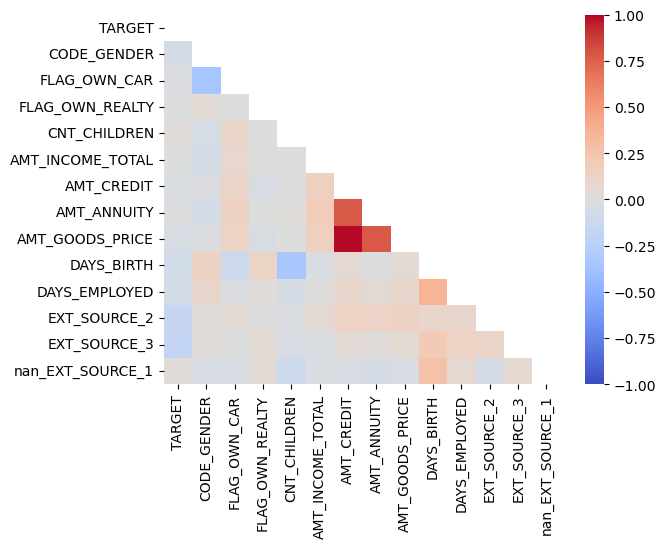

In [28]:
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask)

In [29]:
# on construit la matrice X des Features
X = df.drop(columns="TARGET")
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
0,Cash loans,1,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,0.262949,0.139376,0
1,Cash loans,2,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,0.622246,NaN,0
2,Revolving loans,1,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,0.555912,0.729567,1
3,Cash loans,2,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,0.650442,NaN,1
4,Cash loans,1,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,0.322738,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,1,0,0,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,25.553425,0.646575,0.681632,NaN,0
307507,Cash loans,2,0,1,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,56.917808,NaN,0.115992,NaN,1
307508,Cash loans,2,0,1,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,41.002740,21.701370,0.535722,0.218859,0
307509,Cash loans,2,0,1,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,32.769863,13.112329,0.514163,0.661024,1


In [30]:
# On construit l vecteur y des Targets
y = df["TARGET"]
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307454, dtype: int64

In [31]:
y.values

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [32]:
df.to_csv("./data/preprocessed/df.csv", index=False)

In [33]:
y.value_counts(normalize=True).round(2)

TARGET
0    0.92
1    0.08
Name: proportion, dtype: float64